In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [10]:
# Data needed to run analysis. Have age range and grade range. They are equal in the number of observations
age = list(range(5,30))
grade = list(range(0, 21))
grade.extend([20,20,20,20])
len(grade) == len(age)

True

In [12]:
# Created a DF to shwo the age associated with the grade level
df = pd.DataFrame({"age": age, "grade": grade})
df.head()

,age,grade
0,5,0
1,6,1
2,7,2
3,8,3
4,9,4


As an example, let's build a linear regression to explore what coefficients mean.

Step 1: LinearRegression()

Give the algorithm my requirements.

In [15]:
lm = LinearRegression(fit_intercept=False)

Step 2. my_linear_model.fit(X_train, y_train)

The algorithm will then identify the parameters or rules that are specific to my training data with respect to my requirements. It optimizes a function in order to identify what the weights of each independent variables, or feature, should be. These weights are the coefficients for each X and the intercept (if fit_intercept = True)

In [16]:
lm.fit(df[['age']], df['grade']) # age has to be in double brackets 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

What is returned are the parameters that will be used when running the model on X values to predict y values.

In [26]:
# this is my equation with lm intercept as y-intercept and lm coef as the coef * x(age)
print("predicted_grade =", lm.intercept_, "+", lm.coef_[0], "* age")

predicted_grade = 0.0 + 0.7178885630498535 * age


In [28]:
predicted_grade = lm.predict(df[['age']])

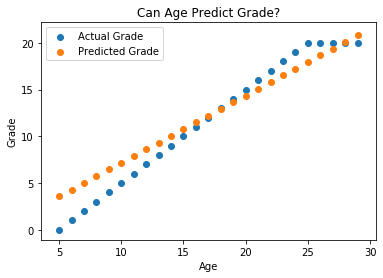

In [34]:
plt.scatter(df.age, df.grade, label = "Actual Grade")
plt.scatter(df.age, predicted_grade, label = "Predicted Grade")
plt.xlabel("Age")
plt.ylabel("Grade")
plt.title("Can Age Predict Grade?")
plt.legend()

Let's create a categorical target variable and use logistic regression. Let's predict if the people in our study have completed High School.

In [36]:
# Making a target variable column completed_HS = Target = y
df["completed_hs"] = df.grade > 12

In [37]:
# Shows how many have/have not completed HS. 52% have not completed HS
df.completed_hs.value_counts(normalize=True)

False    0.52
True     0.48
Name: completed_hs, dtype: float64

In [ ]:
# Gives you the documentation for logistic regression
help(LogisticRegression)

In [38]:
logit = LogisticRegression

In [40]:
logit = logit.fit(df[["age"]], df["completed_hs"])

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
logit = LogisticRegression(C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight={False: 1, True: 99}, 
                  random_state=123, solver='liblinear')

In [41]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   classification_exercises.ipynb
	modified:   model_evaluation.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	EvaluatingModelPerformance.pdf
	Python_Seaborn_Cheat_Sheet.pdf
	explore_practice.ipynb
	iris_df.csv
	model_logistic_regression_lect.ipynb
	untidy_data/

no changes added to commit (use "git add" and/or "git commit -a")


In [43]:
!git add model_logistic_regression_lect.ipynb

In [44]:
!git commit -m "adding lecture practice"

[master 96564cb] adding lecture practice
 1 file changed, 380 insertions(+)
 create mode 100644 model_logistic_regression_lect.ipynb


In [45]:
!git push

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 13.32 KiB | 6.66 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/george887/classification_exercises.git
   364f7bd..96564cb  master -> master
